## Nama : Ashadi Permana
## NIM : 2209106033
## Kelas Praktikum : A22

Import library

In [262]:
import pandas as pd 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, StandardScaler



read dataset

In [263]:
df=pd.read_csv("winequalityN.csv")
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [264]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### MELAKUKAN DATA PRE PROCESSING 

Mengatasi File Kosong

In [265]:
# df["fixed acidity"].fillna(df["fixed acidity"].mean(), inplace=True)
# df["volatile acidity"].fillna(df["volatile acidity"].mean(), inplace=True)
# df["citric acid"].fillna(df["citric acid"].mean(), inplace=True)
# df["residual sugar"].fillna(df["residual sugar"].mean(), inplace=True)
# df["chlorides"].fillna(df["chlorides"].mean(), inplace=True)
# df["pH"].fillna(df["pH"].mean(), inplace=True)
# df["sulphates"].fillna(df["sulphates"].mean(), inplace=True)

In [266]:
df.dropna(inplace=True)

In [267]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Melakukan encoding

In [268]:
enc=pd.get_dummies(df[['type']])
df=df.join(enc)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1,0
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0


In [269]:
x = df[['alcohol','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','density','pH','sulphates','type_red','type_white']]
y = df['quality']

Membagi dataset

In [270]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=800
)

### MELAKUKAN STANDARISASI

In [271]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [272]:
x_train.shape

(5170, 12)

### MENGGUNAKAN SEQUENTIAL MODEL

In [273]:
from keras.models import Sequential
from keras.layers import Dropout

model = Sequential()

# input layer
model.add(Dense(16,activation='relu',input_dim=x_train.shape[1]))
# hidden layer
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))

# output layer
model.add(Dense(1,activation='linear'))

# model.add(Dropout(0.63))


### MELAKUKAN MODEL COMPILE

In [274]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


### MENGGUNAKAN FUNGSI CALLBACK

In [275]:
from keras.callbacks import EarlyStopping , ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_checkpoinnt = ModelCheckpoint('bestmodel.h5',save_best_only=True,save_weights_only=True)

callback_list= [early_stopping,model_checkpoinnt]



### MELATIH MODEL DENGAN MENGGUNAKAN FUNGSI CALLBACK

In [276]:
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test),callbacks=callback_list ,verbose=0,)


In [277]:
x_test

array([[-0.91512468, -0.54573919, -0.43149146, ..., -0.20913251,
        -0.57035183,  0.57035183],
       [-0.58078413,  0.30443921, -0.18726661, ..., -0.4788631 ,
        -0.57035183,  0.57035183],
       [-1.41663551,  1.23190656, -0.85888496, ...,  1.74641429,
        -0.57035183,  0.57035183],
       ...,
       [ 0.42223752, -0.62302813, -0.73677253, ..., -1.55778548,
        -0.57035183,  0.57035183],
       [ 0.42223752, -0.00471657,  0.11801446, ...,  2.15101018,
         1.75330376, -1.75330376],
       [ 0.08789697, -0.93218391,  0.3011831 , ..., -0.07426721,
        -0.57035183,  0.57035183]])

### MELAKUKAN EVALUASI MODEL DENGAN R2 SCORE

In [278]:
y_pred = model.predict(x_test)


41/41 [==============================] - 0s 2ms/step


In [279]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.3906682498083146


## PLOT MAE (MEAN ABSOLUTE ERROR)

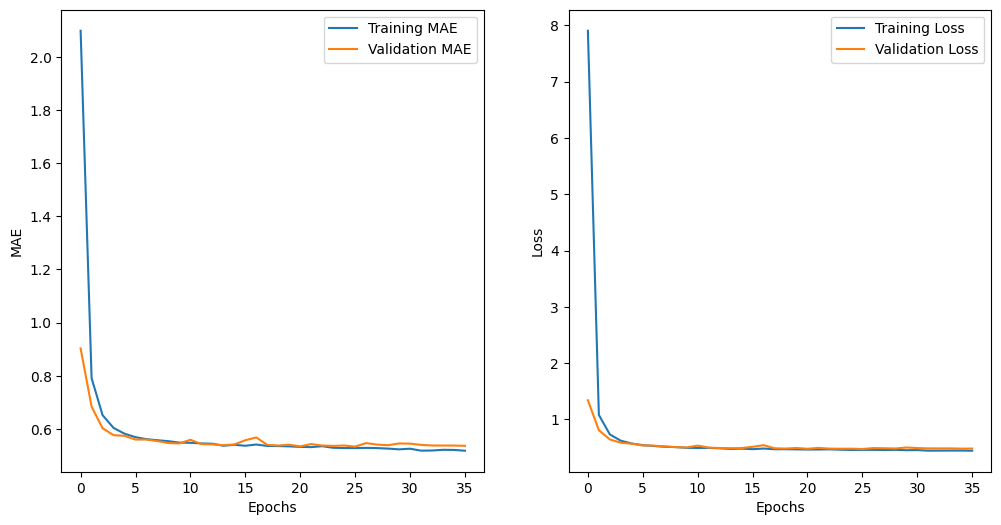

In [280]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()